In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("E:\\Githubb\\git_repo_ML\\insurance_prediction\\insurance.csv")

In [3]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# 🕵️ Exploratory Data Analysis (EDA)
---
In this section, we explore the insurance dataset using summary statistics and visualizations.

- **Shape of the data**
- **Data types and missing values**
- **Feature distributions**
- **Correlation analysis**

In [4]:
data.shape

(1338, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

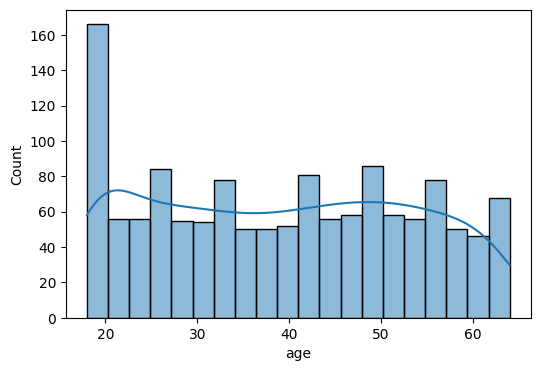

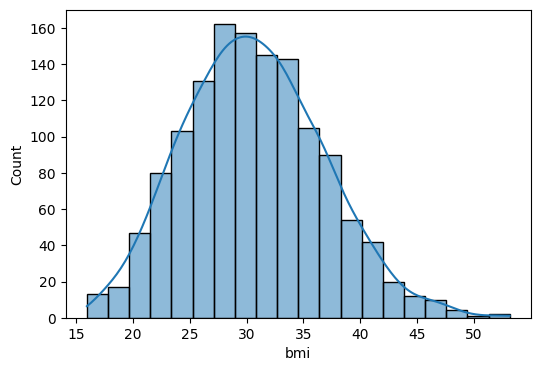

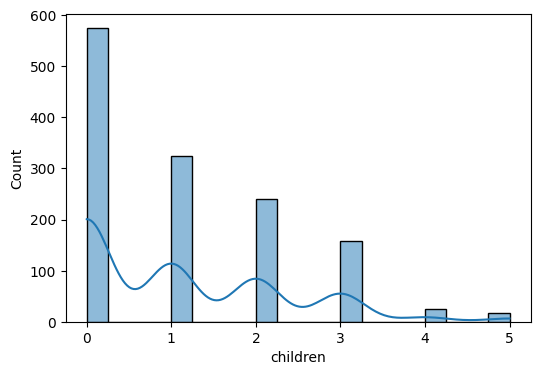

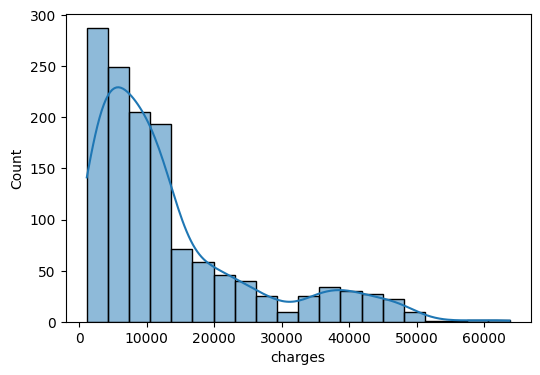

In [9]:
numeric_columns=["age", 'bmi', 'children', 'charges']
for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col],kde=True,bins=20)
    

In [10]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<Axes: xlabel='count', ylabel='smoker'>

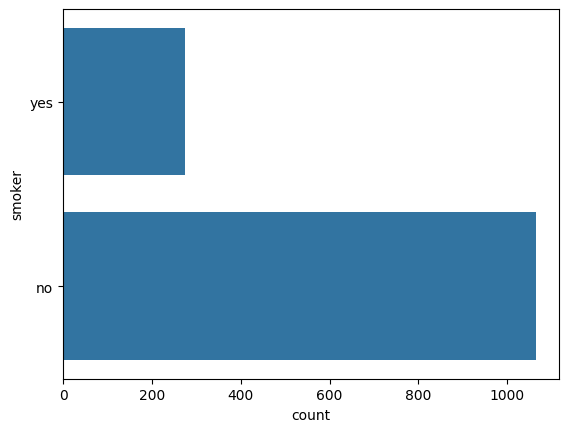

In [11]:
sns.countplot(data['smoker'])

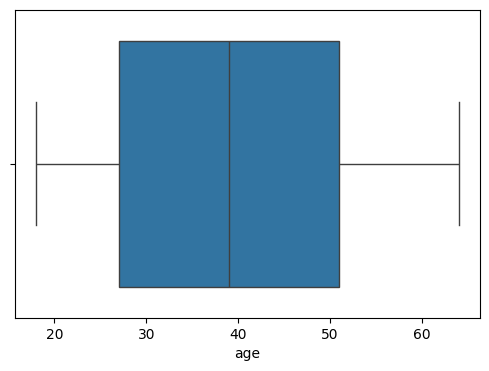

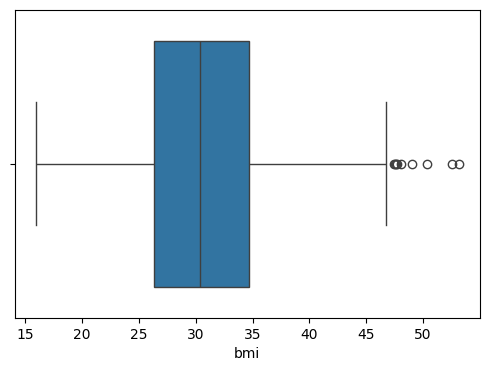

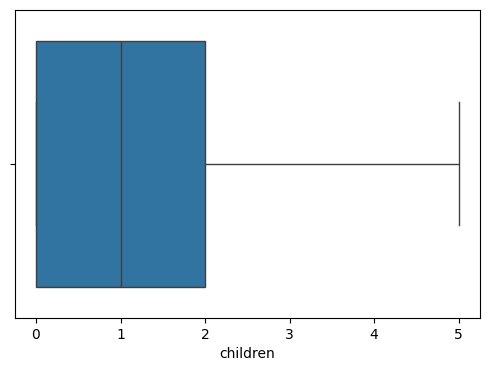

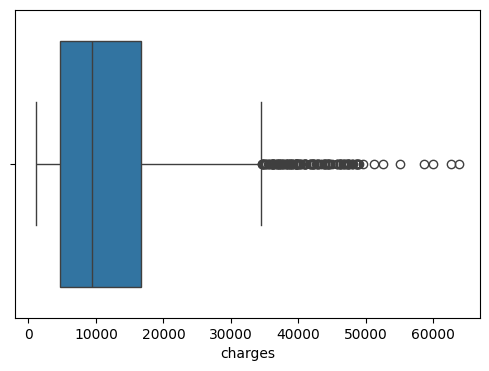

In [12]:
for col in numeric_columns:
    plt.figure(figsize=[6,4])
    sns.boxplot(x=data[col])

<Axes: >

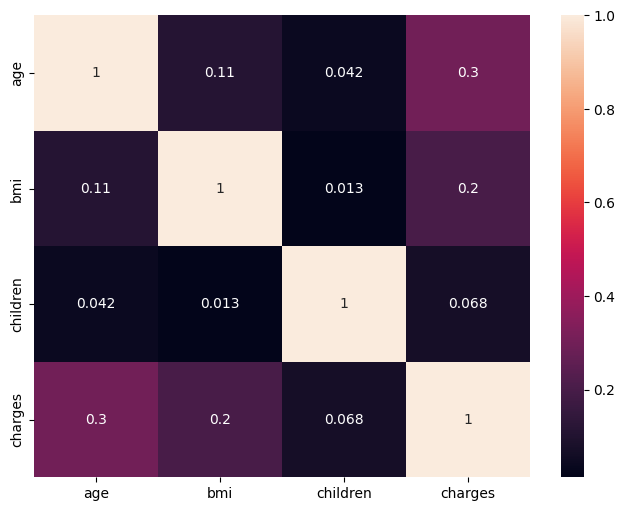

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(numeric_only=True),annot=True)

In [14]:
d_cleaned=data.copy()
d_cleaned

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [15]:
d_cleaned.shape

(1338, 7)

In [16]:
d_cleaned.drop_duplicates(inplace=True)


In [17]:
d_cleaned.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [18]:
d_cleaned.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [19]:
d_cleaned['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [20]:
d_cleaned['sex']=d_cleaned['sex'].map({'male':0 , 'female':1})
d_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [21]:
d_cleaned['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [22]:
d_cleaned['smoker']=d_cleaned['smoker'].map({'no':0 , 'yes':1})
d_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [23]:
d_cleaned['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [24]:
d_cleaned.rename(columns={
    'sex':'is_female',
    'smoker' : 'is_smoker'
},inplace=True)
d_cleaned.head()

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [25]:
# d_cleaned['region']=d_cleaned['region'].map({'southeast': 0 , 'southwest':1  ,'northwest':2 , 'northeast':3  })
# d_cleaned.head()

In [ ]:
d_cleaned=pd.get_dummies(d_cleaned,columns=['region'],drop_first=True) 
d_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False


In [27]:
d_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,True,False,False
1334,18,1,31.920,0,0,2205.98080,False,False,False
1335,18,1,36.850,0,0,1629.83350,False,True,False
1336,21,1,25.800,0,0,2007.94500,False,False,True


In [28]:
d_cleaned=d_cleaned.astype(int)

In [29]:
d_cleaned.dtypes


age                 int64
is_female           int64
bmi                 int64
children            int64
is_smoker           int64
charges             int64
region_northwest    int64
region_southeast    int64
region_southwest    int64
dtype: object

In [30]:
d_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,1
1,18,0,33,1,0,1725,0,1,0
2,28,0,33,3,0,4449,0,1,0
3,33,0,22,0,0,21984,1,0,0
4,32,0,28,0,0,3866,1,0,0


# 🛠️ Feature Engineering & Extraction
---
We transform and enrich the data to improve model performance.

- **Encoding categorical variables** (e.g., sex, smoker, region)
- **Creating BMI categories** (underweight, normal, overweight, obese)
- **Scaling numerical features**

<Axes: xlabel='bmi', ylabel='Count'>

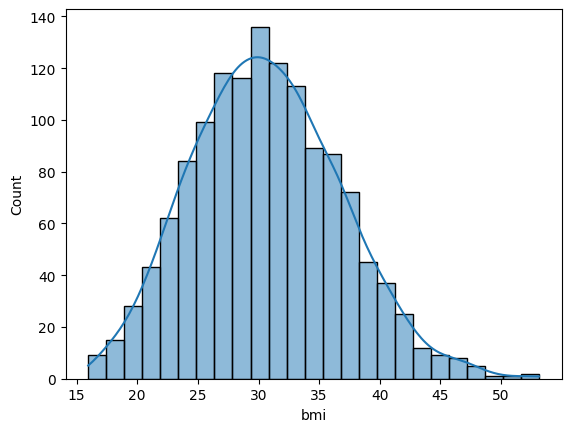

In [31]:
sns.histplot(data['bmi'],kde=True)

In [32]:
d_cleaned['bmi_category']=pd.cut(
    d_cleaned['bmi'],
    bins=[0,18.5,24.9,29.9,float('inf')],
    labels=['underweight','normal','overweight','obese']
)

In [33]:
d_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27,0,1,16884,0,0,1,overweight
1,18,0,33,1,0,1725,0,1,0,obese
2,28,0,33,3,0,4449,0,1,0,obese
3,33,0,22,0,0,21984,1,0,0,normal
4,32,0,28,0,0,3866,1,0,0,overweight
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,obese
1334,18,1,31,0,0,2205,0,0,0,obese
1335,18,1,36,0,0,1629,0,1,0,obese
1336,21,1,25,0,0,2007,0,0,1,overweight


In [34]:
d_cleaned=pd.get_dummies(d_cleaned,columns=['bmi_category'],drop_first=True)
d_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_normal,bmi_category_overweight,bmi_category_obese
0,19,1,27,0,1,16884,0,0,1,False,True,False
1,18,0,33,1,0,1725,0,1,0,False,False,True
2,28,0,33,3,0,4449,0,1,0,False,False,True
3,33,0,22,0,0,21984,1,0,0,True,False,False
4,32,0,28,0,0,3866,1,0,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,False,False,True
1334,18,1,31,0,0,2205,0,0,0,False,False,True
1335,18,1,36,0,0,1629,0,1,0,False,False,True
1336,21,1,25,0,0,2007,0,0,1,False,True,False


In [35]:
d_cleaned=d_cleaned.astype(int)

In [36]:
d_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_normal,bmi_category_overweight,bmi_category_obese
0,19,1,27,0,1,16884,0,0,1,0,1,0
1,18,0,33,1,0,1725,0,1,0,0,0,1
2,28,0,33,3,0,4449,0,1,0,0,0,1
3,33,0,22,0,0,21984,1,0,0,1,0,0
4,32,0,28,0,0,3866,1,0,0,0,1,0


In [37]:
d_cleaned.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_normal', 'bmi_category_overweight', 'bmi_category_obese'],
      dtype='object')

In [38]:
from sklearn.preprocessing import StandardScaler
cols=['age','bmi','children']
scaler=StandardScaler()
d_cleaned[cols]=scaler.fit_transform(d_cleaned[cols])
d_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_normal,bmi_category_overweight,bmi_category_obese
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,1,0,1,0
1,-1.511647,0,0.462463,-0.079442,0,1725,0,1,0,0,0,1
2,-0.799350,0,0.462463,1.580143,0,4449,0,1,0,0,0,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,1,0,0,1,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,1,0,0,0,1,0


In [39]:
from scipy.stats import pearsonr

selected_features=[
    'age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmi_category_normal', 'bmi_category_overweight', 'bmi_category_obese'
]
correaltions= {
    feature:pearsonr(d_cleaned[feature],d_cleaned['charges'])[0]
    for feature in selected_features
}
correaltion_df=pd.DataFrame(list (correaltions.items()),columns=['feature','pearson-co-relation'])
correaltion_df.sort_values(by='pearson-co-relation',ascending=False)

,feature,pearson-co-relation
5,charges,1.000000
4,is_smoker,0.787234
0,age,0.298309
11,bmi_category_obese,0.200348
2,bmi,0.196236
7,region_southeast,0.073577
3,children,0.067390
6,region_northwest,-0.038695
8,region_southwest,-0.043637
1,is_female,-0.058046


In [40]:
cat_features=[
    'is_female', 'is_smoker',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_normal', 'bmi_category_overweight', 'bmi_category_obese'
]

In [41]:
from scipy.stats import chi2_contingency
alpha = 0.05
d_cleaned['charges_bin']=pd.qcut(d_cleaned['charges'],q=4 ,labels=False)
chi2_results={}

for col in cat_features:
    contingency=pd.crosstab(d_cleaned[col],d_cleaned['charges_bin'])
    chi2_stat , p_val, _, _ = chi2_contingency(contingency)
    decision= 'reject null' if p_val< alpha else 'accept null-hypo'
    chi2_results[col]={
        'chi2_statistics': chi2_stat ,
        'p_value': p_val,
        'decision': decision
    }

chi2_df= pd.DataFrame(chi2_results).T
chi2_df=chi2_df.sort_values(by='p_value')
chi2_df

,chi2_statistics,p_value,decision
is_smoker,848.219178,0.0,reject null
region_southeast,15.998167,0.001135,reject null
is_female,10.258784,0.01649,reject null
bmi_category_obese,8.515711,0.036473,reject null
region_southwest,5.091893,0.165191,accept null-hypo
bmi_category_overweight,4.25149,0.235557,accept null-hypo
bmi_category_normal,3.708088,0.29476,accept null-hypo
region_northwest,1.13424,0.768815,accept null-hypo


In [42]:
chi2_df

,chi2_statistics,p_value,decision
is_smoker,848.219178,0.0,reject null
region_southeast,15.998167,0.001135,reject null
is_female,10.258784,0.01649,reject null
bmi_category_obese,8.515711,0.036473,reject null
region_southwest,5.091893,0.165191,accept null-hypo
bmi_category_overweight,4.25149,0.235557,accept null-hypo
bmi_category_normal,3.708088,0.29476,accept null-hypo
region_northwest,1.13424,0.768815,accept null-hypo


In [43]:
final_data=d_cleaned[[
    'age','is_smoker','bmi','children','charges','region_southeast','is_female','bmi_category_obese'
]]
final_data

,age,is_smoker,bmi,children,charges,region_southeast,is_female,bmi_category_obese
0,-1.440418,1,-0.517949,-0.909234,16884,0,1,0
1,-1.511647,0,0.462463,-0.079442,1725,1,0,1
2,-0.799350,0,0.462463,1.580143,4449,1,0,1
3,-0.443201,0,-1.334960,-0.909234,21984,0,0,0
4,-0.514431,0,-0.354547,-0.909234,3866,0,0,0
...,...,...,...,...,...,...,...,...
1333,0.767704,0,-0.027743,1.580143,10600,0,0,1
1334,-1.511647,0,0.135659,-0.909234,2205,0,1,1
1335,-1.511647,0,0.952670,-0.909234,1629,1,1,1
1336,-1.297958,0,-0.844753,-0.909234,2007,0,1,0


In [44]:
from sklearn.model_selection import train_test_split
X=final_data.drop('charges',axis=1)
y=final_data['charges']


# 🤖 Model Training & Prediction
---
We split the data into training and test sets, train a linear regression model, and make predictions.

- **Train-test split**
- **Model fitting**
- **Prediction**

In [46]:
X_train , X_test , y_train , y_test =train_test_split(X,y,test_size=0.33 , random_state= 42) 

In [47]:
from sklearn.linear_model import LinearRegression


In [49]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

# 📊 Model Evaluation
---
We evaluate the model's performance using R² and Adjusted R² metrics.

- **R² Score**: Measures the proportion of variance explained by the model.
- **Adjusted R²**: Adjusts R² for the number of predictors.

In [50]:
y_pred=model.predict(X_test)

In [51]:
y_pred

array([ 7.92127799e+03,  4.92119238e+03,  1.44361661e+04,  3.18350564e+04,
        8.67581266e+03,  1.31496370e+04,  2.96706500e+04,  1.35753225e+03,
        1.11138061e+04,  9.75901566e+03,  1.09718507e+04,  3.19207448e+04,
        3.11479922e+04,  1.64631895e+04,  1.01416669e+04,  8.32071774e+03,
        5.33803897e+03,  3.20017531e+04,  3.02451537e+03,  3.68006468e+03,
        4.66358966e+03,  2.83775977e+04,  1.37230536e+04,  2.91390286e+04,
        3.12678786e+04,  6.11451613e+03,  3.45210883e+04,  3.77368630e+04,
        1.25138644e+04,  1.39034203e+04,  7.61698339e+03,  1.29803907e+04,
        2.19973352e+02,  1.13562442e+04,  3.73840277e+04,  1.34005302e+04,
        3.09042974e+03,  4.18337835e+03,  3.11602233e+04,  7.90007874e+03,
        6.09078081e+03,  2.99188465e+04,  3.46245387e+04,  1.31113974e+04,
        7.82128672e+03,  2.97515542e+03,  5.17030083e+03,  7.58441192e+03,
        3.39821208e+03,  1.01377275e+04,  7.54018550e+03,  1.05902298e+04,
        2.99695962e+04,  

In [52]:
y_test

900      8688
1064     5708
1256    11436
298     38746
237      4463
        ...  
731     10065
321     24671
477      2534
784      4350
1193     8671
Name: charges, Length: 442, dtype: int64

In [53]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
r2

0.7737291785851905

In [55]:
n=X_test.shape[0]
p=X_test.shape[1]
adjusted_r2= 1-(((1-r2)*(n-1))/(n-p-1))
adjusted_r2

0.7700796492075324